In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
            
rest=pd.read_csv('Restaurants.csv')
rest.head(5)

,name,area,rating,rating_count,cusine,cost_for_two,address,online_order,table_reservation,longitude,latitude
0,China Garten,Domlur,NaN,NaN,Chinese,400.0,"Shop 82, Ground Floor, Vasanthappa Garden, 13t...",True,False,77.639977,12.965844
1,Cafe Kaara,Ulsoor,4.3,188.0,"Cafe, Salad, Desserts, Pizza",750.0,"29, Ulsoor Road, Opposite Salarpuria Windsor, ...",False,False,77.617962,12.975298
2,Hyderabad Biryani House,Malleshwaram,4.2,291.0,"Biryani, Hyderabadi, Chinese",800.0,"45, Sampige Road, Malleshwaram West, Malleshwa...",False,False,77.571417,12.994095
3,The Coffee Bean & Tea Leaf,MG Road,4.0,308.0,Cafe,700.0,"1st Floor, 1 MG Road Mall, Trinity Circle, Opp...",True,False,77.620303,12.973778
4,Fly Dining,Nagawara,3.8,137.0,"Continental, North Indian",14000.0,"House Of Life, Near Manyata Tech Park, Nagawar...",False,False,77.610328,13.047513


In [2]:
rest.shape

(20283, 11)

In [3]:
rest.describe()

,rating,rating_count,cost_for_two,longitude,latitude
count,13590.000000,13279.000000,20111.000000,20283.000000,20283.000000
mean,3.611074,212.955644,440.503108,73.870561,12.340826
std,0.413892,657.193027,374.176366,16.649405,2.821184
min,1.800000,2.000000,40.000000,-3.025162,-6.403420
25%,3.300000,14.000000,250.000000,77.578055,12.914472
50%,3.600000,42.000000,350.000000,77.615935,12.956640
75%,3.900000,152.000000,500.000000,77.654974,12.994144
max,4.900000,19305.000000,14000.000000,88.367378,77.594305


In [4]:
rest.isnull().sum()

name                    0
area                    0
rating               6693
rating_count         7004
cusine                  2
cost_for_two          172
address               240
online_order            0
table_reservation       0
longitude               0
latitude                0
dtype: int64

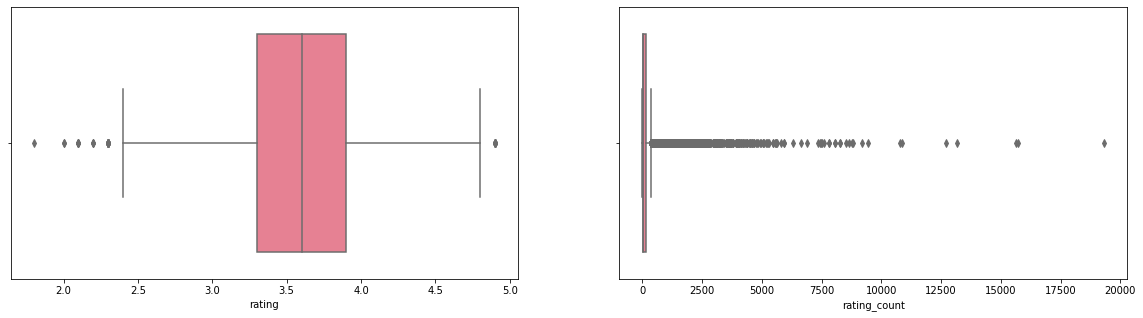

In [5]:
fig,axis=plt.subplots(1,2,figsize=(20,5))
sns.set_palette(sns.husl_palette())
sns.boxplot(rest['rating'],ax=axis[0]) 
sns.boxplot(rest.rating_count,ax=axis[1]);

The ratings depends on the factors like popularity and the time when the resturant was opened. The newer restuarants will get less numbers of rating as compared to the older restaurants.Similarly, the popular restuarants will get more number of ratings than the less popular one. This create outliers in the dataset.

In [6]:
rest.cusine=rest.cusine.fillna("Missing")  #filling the NaN of cuisine with missing
cuisine_dict = {}

In [7]:
for i in rest.cusine.values:
    splitted_cuisine=i.split(',')
    for element in splitted_cuisine:
        element=element.strip()
        if element in cuisine_dict:
            cuisine_dict[element]+=1
        else:
            cuisine_dict[element]=1


In [8]:
sort_cuisine = sorted(cuisine_dict.items(), key=lambda x: x[1], reverse=True)
sort_cuisine  #cuisine found in Bangalore in descending order

[('North Indian', 7833),
 ('Chinese', 5718),
 ('Fast Food', 4091),
 ('South Indian', 3814),
 ('Biryani', 2867),
 ('Beverages', 2718),
 ('Desserts', 2303),
 ('Street Food', 1324),
 ('Bakery', 1166),
 ('Continental', 1114),
 ('Ice Cream', 1045),
 ('Cafe', 1003),
 ('Mughlai', 769),
 ('Pizza', 724),
 ('Andhra', 723),
 ('Italian', 718),
 ('Rolls', 609),
 ('Seafood', 541),
 ('Juices', 530),
 ('Burger', 507),
 ('Sandwich', 440),
 ('Mithai', 424),
 ('Kerala', 412),
 ('Kebab', 375),
 ('Momos', 373),
 ('Healthy Food', 349),
 ('Arabian', 299),
 ('Asian', 296),
 ('Thai', 247),
 ('American', 244),
 ('Salad', 212),
 ('Bengali', 200),
 ('BBQ', 197),
 ('Finger Food', 194),
 ('Hyderabadi', 178),
 ('Mangalorean', 175),
 ('Tea', 156),
 ('Mexican', 153),
 ('European', 119),
 ('Wraps', 97),
 ('Mediterranean', 94),
 ('Lebanese', 80),
 ('Coffee', 76),
 ('Steak', 73),
 ('Rajasthani', 68),
 ('Japanese', 61),
 ('North Eastern', 61),
 ('Chettinad', 58),
 ('Tibetan', 57),
 ('Odia', 49),
 ('Maharashtrian', 49),
 (

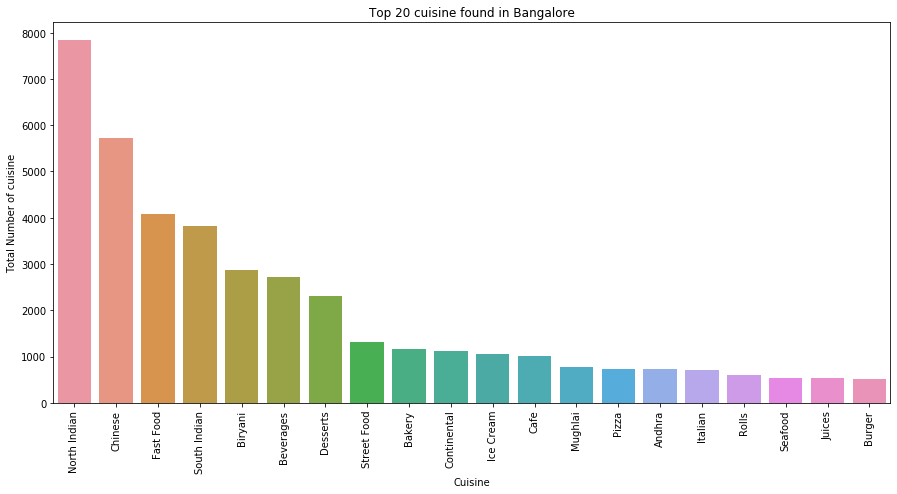

In [9]:
top20 = sorted(cuisine_dict.items(), key=lambda x: x[1], reverse=True)[:20]
cuisine_df = pd.DataFrame(top20,columns=['Cuisine','Total'])
fig,axes=plt.subplots(1,1,figsize=(15,7))
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_title("Top 20 cuisine found in Bangalore");
sns.barplot(cuisine_df.Cuisine,cuisine_df.Total,data=cuisine_df)
axes.set_ylabel('Total Number of cuisine');
plt.savefig('cuisine.png',bbox_inches='tight',pad_inches=0.8)

In [10]:
area_count={}
for i in rest.area.values:
        if i in area_count:
            area_count[i]+=1
        else:
            area_count[i]=1


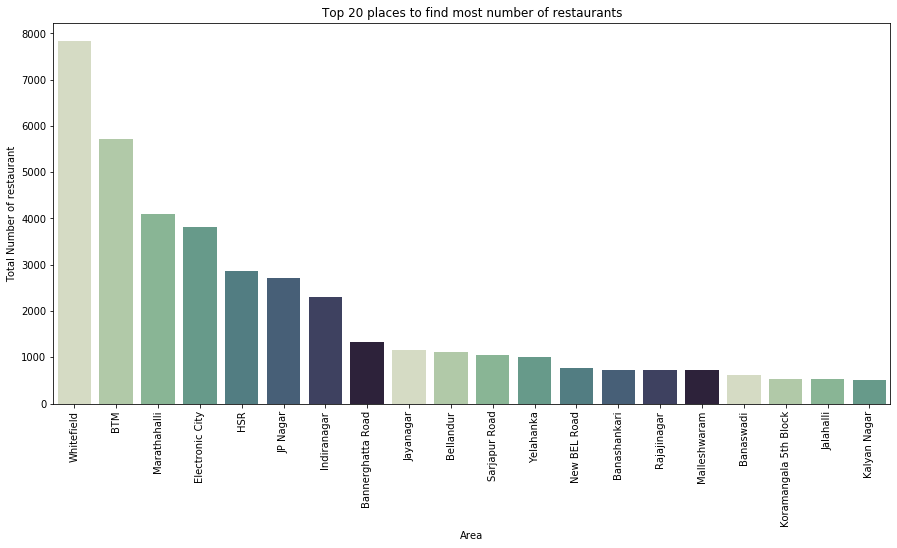

In [11]:
top20_area=sorted(area_count.items(), key=lambda x: x[1], reverse=True)[:20]
area_df=pd.DataFrame(top20_area,columns=['Area','Total'])
fig,axes=plt.subplots(1,1,figsize=(15,7))
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
sns.barplot(area_df.Area,cuisine_df.Total,data=cuisine_df,palette=sns.cubehelix_palette(8, start=.5, rot=-.75))
axes.set_ylabel('Total Number of restaurant')
axes.set_title("Top 20 places to find most number of restaurants");
plt.savefig('20 places to find most number of restaurants',bbox_inches='tight',pad_inches=0.8)

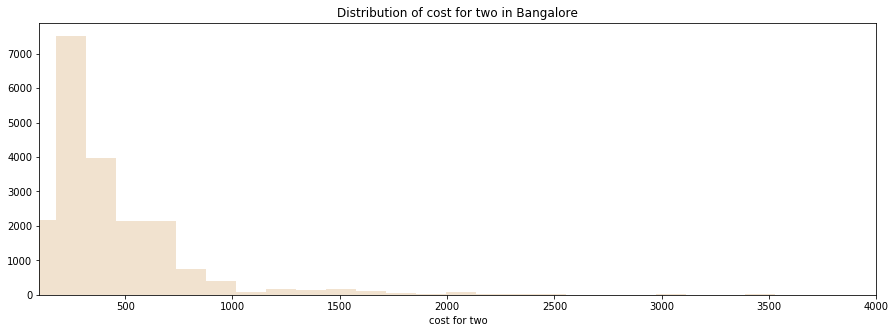

In [12]:
fig,axes=plt.subplots(1,1,figsize=(15,5))
axes.set_xlabel('cost for two') 
plt.hist(rest.cost_for_two,bins=100,color='burlywood',alpha=.4,histtype='bar'); #histogram showing the distribution of cost for two in Bangalore
plt.xlim(100, 4000)
axes.set_title("Distribution of cost for two in Bangalore");

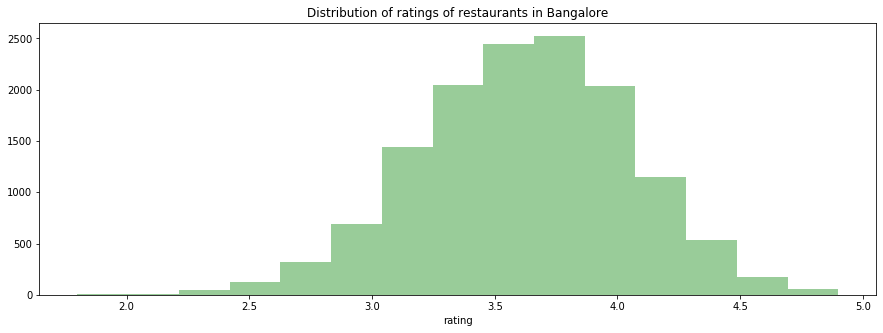

In [13]:
fig,axes=plt.subplots(1,1,figsize=(15,5))
sns.distplot(rest.rating,bins=15,color='green',kde=False); #histogram showing the distribution of ratings of restaurants in Bangalore
axes.set_title("Distribution of ratings of restaurants in Bangalore");

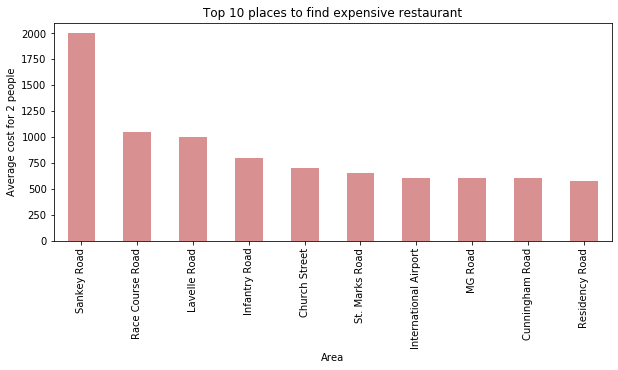

In [14]:
fig,axes=plt.subplots(1,1,figsize=(10,4))
rest.groupby('area')['cost_for_two'].median().sort_values(ascending=False)[:10].plot.bar(color='firebrick',alpha=0.5)
axes.set_xlabel('Area') 
axes.set_ylabel('Average cost for 2 people')
axes.set_title("Top 10 places to find expensive restaurant");
plt.savefig('10 places to find most number of restaurants',bbox_inches='tight',pad_inches=0.8)

In [15]:
df=pd.read_csv("Restaurants.csv")
df = df[df['rating'].notna()] #dropping the restaurants where ratings is NaN
df.isnull().sum()

name                   0
area                   0
rating                 0
rating_count         311
cusine                 0
cost_for_two         109
address              132
online_order           0
table_reservation      0
longitude              0
latitude               0
dtype: int64

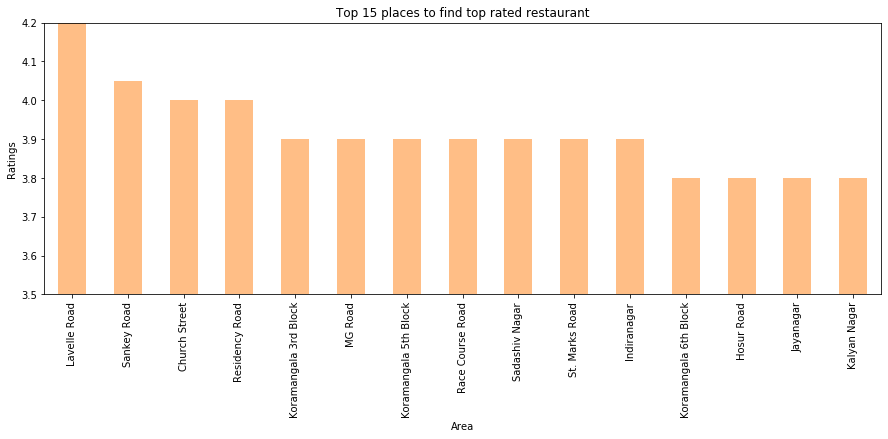

In [16]:
fig,axes=plt.subplots(1,1,figsize=(15,5))
df.groupby('area')['rating'].median().sort_values(ascending=False)[:15].plot.bar(color='tab:orange',alpha=.5)
axes.set_xlabel('Area') 
axes.set_ylabel('Ratings')
plt.ylim(3.5, 4.2)
axes.set_title("Top 15 places to find top rated restaurant");
plt.savefig('15 places to find top rated restaurants',bbox_inches='tight',pad_inches=0.8)

In [17]:
count={}
online=rest[rest['online_order']==True]
for i in online.area.values:
    if i in count:
        count[i]+=1
    else:
        count[i]=1
         
count_sort=sorted(count.items(),key=lambda x: x[1], reverse=True)[:20] 
online_df=pd.DataFrame(count_sort,columns=['Area','Number of restaurants take online order'])

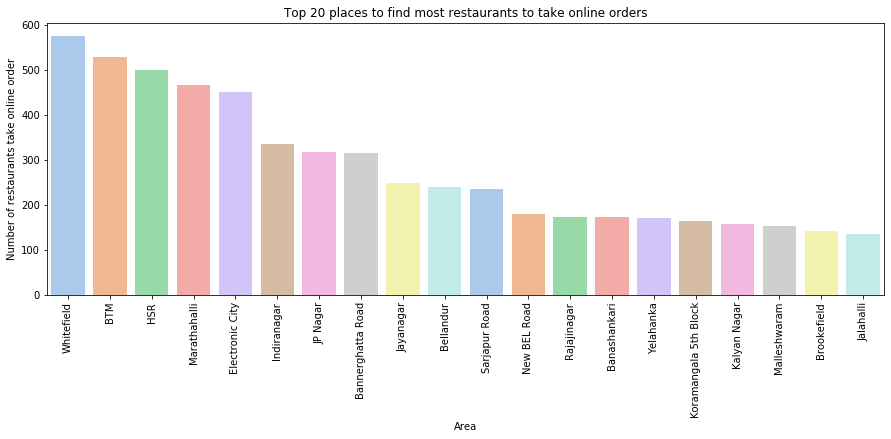

In [18]:
fig,axes=plt.subplots(1,1,figsize=(15,5));
axes.set_title("Top 20 places to find most restaurants to take online orders");
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
sns.barplot(online_df.Area,online_df['Number of restaurants take online order'],palette='pastel');
plt.savefig('online',bbox_inches='tight',pad_inches=0.8)

In [19]:
count_resv={}
reservation=rest[rest['table_reservation']==True]
for i in reservation.area.values:
    if i in count_resv:
        count_resv[i]+=1
    else:
        count_resv[i]=1
         
resv_sort=sorted(count_resv.items(),key=lambda x: x[1], reverse=True)[:20]
resv_df=pd.DataFrame(resv_sort,columns=['Area','Number of restaurants take table reservation'])

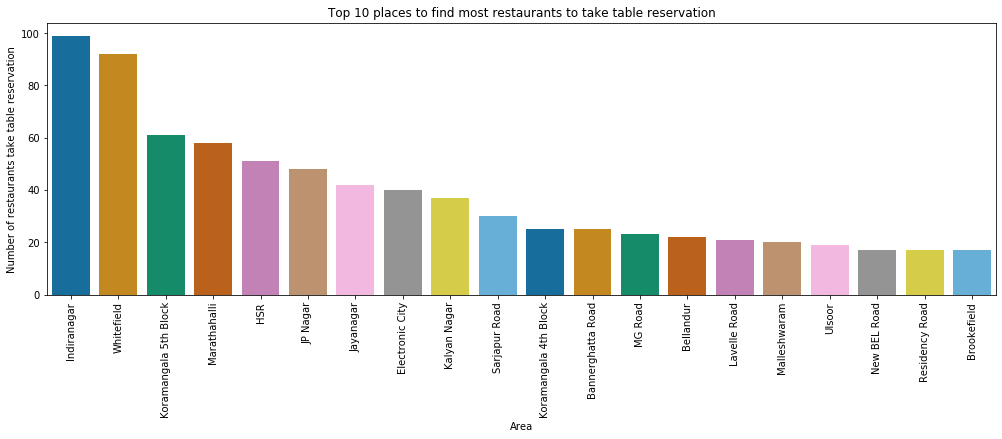

In [20]:
fig,axes=plt.subplots(1,1,figsize=(17,5));
axes.set_title("Top 10 places to find most restaurants to take table reservation");
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

sns.barplot(resv_df.Area,resv_df['Number of restaurants take table reservation'],palette='colorblind');
plt.savefig('table_reservation',bbox_inches='tight',pad_inches=0.8)

##### That's all Folks!